# Tabular models

In [1]:
from fastai import *
from fastai.tabular import *

In [2]:
import os
import re
from collections import Counter
import random

In [3]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
path = '/floyd/home/notebooks'
data_path = '/floyd/home/data'
model_path = '/floyd/home/models'

In [5]:
os.listdir(data_path)

['date_data.csv',
 'ed_databunch',
 'tabular_data.csv',
 'targets.csv',
 'subj_data.csv',
 'inf_control_data.csv',
 'med_hx.csv',
 'med_lab.csv',
 '.ipynb_checkpoints',
 'jj_modified_bch_data.xlsx',
 'med_freq.csv']

In [63]:
df1 = pd.read_csv(data_path +'/tabular_data.csv')
df2 = pd.read_csv(data_path +'/targets.csv')
df3 = pd.read_csv(data_path + '/subj_data.csv')
df4 = pd.read_csv(data_path +'/date_data.csv')
df5 = pd.read_csv(data_path +'/med_hx.csv')

In [64]:
len(df1), len(df2), len(df3), len(df4), len(df5)

(136993, 136993, 136993, 136993, 136993)

In [7]:
df4.head()

,Unnamed: 0,Triage Date & Time,Reg Date & Time,PIA Date & Time,Disposition Date & Time,Left ED Date & Time
0,0,31/03/2018 11:55:00PM,01/04/2018 12:03:00AM,01/04/2018 1:36:00AM,01/04/2018 7:00:00AM,01/04/2018 7:00:00AM
1,1,31/03/2018 11:22:00PM,01/04/2018 12:08:00AM,01/04/2018 1:10:00AM,01/04/2018 8:49:00AM,01/04/2018 8:49:00AM
2,2,01/04/2018 12:01:00AM,01/04/2018 12:10:00AM,01/04/2018 1:49:00AM,01/04/2018 4:40:00AM,01/04/2018 4:40:00AM
3,3,01/04/2018 12:04:00AM,01/04/2018 12:13:00AM,NaN,01/04/2018 1:25:00AM,01/04/2018 1:25:00AM
4,4,01/04/2018 12:11:00AM,01/04/2018 12:14:00AM,01/04/2018 1:40:00AM,01/04/2018 6:59:00AM,01/04/2018 6:59:00AM


In [65]:
add_datepart(df4, 'Triage Date & Time');

,Unnamed: 0,Reg Date & Time,PIA Date & Time,Disposition Date & Time,Left ED Date & Time,Triage Date & TimeYear,Triage Date & TimeMonth,Triage Date & TimeWeek,Triage Date & TimeDay,Triage Date & TimeDayofweek,Triage Date & TimeDayofyear,Triage Date & TimeIs_month_end,Triage Date & TimeIs_month_start,Triage Date & TimeIs_quarter_end,Triage Date & TimeIs_quarter_start,Triage Date & TimeIs_year_end,Triage Date & TimeIs_year_start,Triage Date & TimeElapsed
0,0,01/04/2018 12:03:00AM,01/04/2018 1:36:00AM,01/04/2018 7:00:00AM,01/04/2018 7:00:00AM,2018.0,3.0,13.0,31.0,5.0,90.0,True,False,True,False,False,False,1522540500
1,1,01/04/2018 12:08:00AM,01/04/2018 1:10:00AM,01/04/2018 8:49:00AM,01/04/2018 8:49:00AM,2018.0,3.0,13.0,31.0,5.0,90.0,True,False,True,False,False,False,1522538520
2,2,01/04/2018 12:10:00AM,01/04/2018 1:49:00AM,01/04/2018 4:40:00AM,01/04/2018 4:40:00AM,2018.0,1.0,1.0,4.0,3.0,4.0,False,False,False,False,False,False,1515024060
3,3,01/04/2018 12:13:00AM,NaN,01/04/2018 1:25:00AM,01/04/2018 1:25:00AM,2018.0,1.0,1.0,4.0,3.0,4.0,False,False,False,False,False,False,1515024240
4,4,01/04/2018 12:14:00AM,01/04/2018 1:40:00AM,01/04/2018 6:59:00AM,01/04/2018 6:59:00AM,2018.0,1.0,1.0,4.0,3.0,4.0,False,False,False,False,False,False,1515024660
5,5,01/04/2018 12:17:00AM,01/04/2018 2:03:00AM,01/04/2018 3:20:00AM,01/04/2018 3:20:00AM,2018.0,1.0,1.0,4.0,3.0,4.0,False,False,False,False,False,False,1515024360
6,6,01/04/2018 12:20:00AM,01/04/2018 12:30:00AM,01/04/2018 2:03:00AM,01/04/2018 4:14:00AM,2018.0,1.0,1.0,4.0,3.0,4.0,False,False,False,False,False,False,1515024600
7,7,01/04/2018 12:23:00AM,01/04/2018 2:03:00AM,01/04/2018 3:20:00AM,01/04/2018 3:20:00AM,2018.0,1.0,1.0,4.0,3.0,4.0,False,False,False,False,False,False,1515025020
8,8,01/04/2018 12:26:00AM,01/04/2018 2:19:00AM,01/04/2018 3:55:00AM,01/04/2018 3:55:00AM,2018.0,1.0,1.0,4.0,3.0,4.0,False,False,False,False,False,False,1515025080
9,9,01/04/2018 12:27:00AM,01/04/2018 2:14:00AM,01/04/2018 4:12:00AM,01/04/2018 4:12:00AM,2018.0,1.0,1.0,4.0,3.0,4.0,False,False,False,False,False,False,1515024840


In [9]:
df4.columns

Index(['Unnamed: 0', 'Reg Date & Time', 'PIA Date & Time',
       'Disposition Date & Time', 'Left ED Date & Time',
       'Triage Date & TimeYear', 'Triage Date & TimeMonth',
       'Triage Date & TimeWeek', 'Triage Date & TimeDay',
       'Triage Date & TimeDayofweek', 'Triage Date & TimeDayofyear',
       'Triage Date & TimeIs_month_end', 'Triage Date & TimeIs_month_start',
       'Triage Date & TimeIs_quarter_end',
       'Triage Date & TimeIs_quarter_start', 'Triage Date & TimeIs_year_end',
       'Triage Date & TimeIs_year_start', 'Triage Date & TimeElapsed'],
      dtype='object')

In [13]:
date_df = df4[['Triage Date & TimeMonth',
       'Triage Date & TimeWeek', 'Triage Date & TimeDay',
       'Triage Date & TimeDayofweek', 'Triage Date & TimeDayofyear',
       'Triage Date & TimeIs_month_end', 'Triage Date & TimeIs_month_start',
       'Triage Date & TimeIs_quarter_end',
       'Triage Date & TimeIs_quarter_start', 'Triage Date & TimeIs_year_end',
       'Triage Date & TimeIs_year_start', 'Triage Date & TimeElapsed']]

In [14]:
date_df.head()

,Triage Date & TimeMonth,Triage Date & TimeWeek,Triage Date & TimeDay,Triage Date & TimeDayofweek,Triage Date & TimeDayofyear,Triage Date & TimeIs_month_end,Triage Date & TimeIs_month_start,Triage Date & TimeIs_quarter_end,Triage Date & TimeIs_quarter_start,Triage Date & TimeIs_year_end,Triage Date & TimeIs_year_start,Triage Date & TimeElapsed
0,3.0,13.0,31.0,5.0,90.0,True,False,True,False,False,False,1522540500
1,3.0,13.0,31.0,5.0,90.0,True,False,True,False,False,False,1522538520
2,1.0,1.0,4.0,3.0,4.0,False,False,False,False,False,False,1515024060
3,1.0,1.0,4.0,3.0,4.0,False,False,False,False,False,False,1515024240
4,1.0,1.0,4.0,3.0,4.0,False,False,False,False,False,False,1515024660


In [21]:
df5 = pd.read_csv(data_path +'/med_hx.csv')

In [24]:
df5.drop(['Unnamed: 0'], axis = 1, inplace = True)
df5.columns = ['medhx' + str(i+1) for i in range(6)]
df5.head()

,medhx1,medhx2,medhx3,medhx4,medhx5,medhx6
0,No Significant Medical History,NaN,NaN,NaN,NaN,NaN
1,Substance Misuse,NaN,NaN,NaN,NaN,NaN
2,Hypertension (HTN),NIDDM (Non-Insulin-Dependent Diabetes Mellitus),MI (Myocardial Infarction),ACS (Acute Coronary Syndrome),bronchiectasis,triple a repair
3,Hypertension (HTN),NaN,NaN,NaN,NaN,NaN
4,Asthma,Seizure,palpitations,leaky hrt valve,NaN,NaN


In [25]:
df = pd.concat([df1,df2,df3, date_df, df5], axis = 1)

In [26]:
len(df)

136993

In [27]:
df.head()

,Unnamed: 0,ID,TriageLevel,AgeInYrs,GenderDesc,DischargeDisposition,PresentingComplaint,PresentingComplaintDesc,AdmitLocation,PatientService,...,Triage Date & TimeIs_quarter_start,Triage Date & TimeIs_year_end,Triage Date & TimeIs_year_start,Triage Date & TimeElapsed,medhx1,medhx2,medhx3,medhx4,medhx5,medhx6
0,0,1,3.0,12.0,Male,17,852,Fever,NaN,NaN,...,False,False,False,1522540500,No Significant Medical History,NaN,NaN,NaN,NaN,NaN
1,1,2,2.0,80.0,Female,17,401,Altered level of consciousness,NaN,NaN,...,False,False,False,1522538520,Substance Misuse,NaN,NaN,NaN,NaN,NaN
2,2,3,3.0,3.0,Male,17,253,Constipation,NaN,NaN,...,False,False,False,1515024060,Hypertension (HTN),NIDDM (Non-Insulin-Dependent Diabetes Mellitus),MI (Myocardial Infarction),ACS (Acute Coronary Syndrome),bronchiectasis,triple a repair
3,3,4,3.0,56.0,Female,62,409,Extremity weakness/symptoms of CVA,NaN,NaN,...,False,False,False,1515024240,Hypertension (HTN),NaN,NaN,NaN,NaN,NaN
4,4,5,2.0,69.0,Female,17,3,Chest pain - cardiac features,NaN,NaN,...,False,False,False,1515024660,Asthma,Seizure,palpitations,leaky hrt valve,NaN,NaN


In [28]:
list(df.columns)

['Unnamed: 0',
 'ID',
 'TriageLevel',
 'AgeInYrs',
 'GenderDesc',
 'DischargeDisposition',
 'PresentingComplaint',
 'PresentingComplaintDesc',
 'AdmitLocation',
 'PatientService',
 'BloodPressure_LastEDReading',
 'systolic',
 'diastolic',
 'temp',
 'pulse',
 'o2sat',
 'Unnamed: 0',
 'service',
 'target2',
 'target',
 'outcome',
 'discharge',
 'dispo',
 'Unnamed: 0',
 'MedicalHistory',
 'SubjectiveNotes',
 'Triage Date & TimeMonth',
 'Triage Date & TimeWeek',
 'Triage Date & TimeDay',
 'Triage Date & TimeDayofweek',
 'Triage Date & TimeDayofyear',
 'Triage Date & TimeIs_month_end',
 'Triage Date & TimeIs_month_start',
 'Triage Date & TimeIs_quarter_end',
 'Triage Date & TimeIs_quarter_start',
 'Triage Date & TimeIs_year_end',
 'Triage Date & TimeIs_year_start',
 'Triage Date & TimeElapsed',
 'medhx1',
 'medhx2',
 'medhx3',
 'medhx4',
 'medhx5',
 'medhx6']

In [66]:
#check that I got what I wanted out of the prior setp
count = Counter(df['outcome']); count

Counter({'discharge': 120106, 'sadmit': 2272, 'madmit': 13270, 'ICU': 1345})

In [13]:
dep_var = 'outcome'
cat_names = ['TriageLevel',
 'GenderDesc',
 'PresentingComplaint']
cont_names = ['AgeInYrs', 'o2sat', 'pulse','temp','systolic','diastolic']
procs = [FillMissing, Categorify, Normalize]

In [14]:
test = TabularList.from_df(df.copy(),cat_names=cat_names, cont_names=cont_names)

In [15]:
valid_idxs = random.sample(range(len(df)), len(df)//5); len(valid_idxs)

27398

In [34]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(valid_idxs)
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [22]:
len(data.train_ds), len(data.valid_ds)

(109595, 27398)

In [23]:
len(data.train_ds) +  len(data.valid_ds) == len(data.test_ds)

True

In [24]:
data.save(data_path + '/ed_databunch')

In [25]:
data.show_batch(rows=10)

TriageLevel,GenderDesc,PresentingComplaint,o2sat_na,pulse_na,temp_na,systolic_na,diastolic_na,AgeInYrs,o2sat,pulse,temp,systolic,diastolic,target
2.0,Female,301,False,False,False,False,False,0.5689,-0.2583,0.1498,-0.2276,1.2221,0.5450,discharge
3.0,Male,852,False,False,False,True,True,-1.6620,0.3022,1.9023,2.7299,-0.1164,-0.0549,discharge
3.0,Male,551,False,False,False,False,False,1.1092,0.0219,-1.0320,-0.4125,0.1067,-0.0549,discharge
2.0,Male,504,False,False,False,False,False,1.7327,-0.5386,0.3536,-0.0428,1.7128,-0.0549,discharge
3.0,Female,257,False,False,False,False,False,-0.4703,0.5824,-0.9505,-0.0428,-0.3394,0.6950,discharge
5.0,Male,719,False,False,False,False,False,-0.6781,0.5824,-0.3800,0.1421,-0.5179,0.0201,discharge
2.0,Female,551,False,False,False,False,False,0.0701,0.5824,-0.2170,-1.1519,-0.6071,-0.5048,discharge
3.0,Male,752,False,False,False,False,False,-1.6342,0.0219,1.0057,-0.4125,-1.5440,-1.2546,discharge
3.0,Male,852,False,False,False,False,False,-1.5095,0.3022,1.9838,4.0238,-1.4994,-1.7795,discharge
3.0,Male,151,False,False,False,False,False,0.9430,-0.5386,-0.7875,-0.7822,0.5082,0.6950,discharge


In [18]:
f1 = FBeta(beta=1, average = 'weighted')

In [27]:
learn = tabular_learner(data, layers=[200,100], metrics=[accuracy,f1])

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


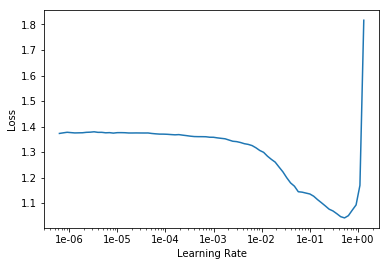

In [29]:
learn.recorder.plot()

In [30]:
learn.fit_one_cycle(5, 1e-1)

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.374371,0.381770,0.881086,0.837814,00:18
1,0.370919,2.424722,0.886050,0.850599,00:18
2,0.353213,0.478033,0.885503,0.851544,00:18
3,0.327756,0.350664,0.885612,0.849811,00:18
4,0.333046,0.357082,0.888094,0.857315,00:18


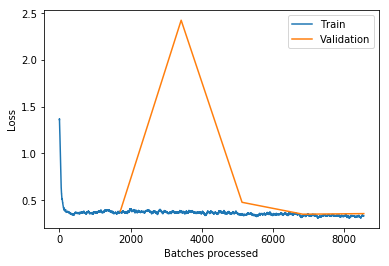

In [31]:
learn.recorder.plot_losses()

In [32]:
learn = tabular_learner(data, layers=[200,100], metrics=[accuracy,f1])
learn.fit_one_cycle(10, 1e-2)

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.333169,0.344693,0.884809,0.851478,00:18
1,0.354932,0.342966,0.886196,0.856591,00:18
2,0.334693,0.341903,0.887255,0.857294,00:18
3,0.334851,0.336169,0.887985,0.859119,00:18
4,0.338736,0.342084,0.887437,0.853416,00:18
5,0.344477,0.338685,0.886525,0.852332,00:18
6,0.331653,0.335892,0.887839,0.858500,00:18
7,0.324366,0.330495,0.888459,0.859923,00:18
8,0.334767,0.336139,0.888714,0.862758,00:18
9,0.335335,0.332870,0.888678,0.858748,00:18


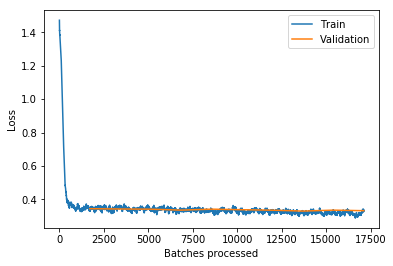

In [33]:
learn.recorder.plot_losses()

In [36]:
preds, targets = learn.get_preds(DatasetType.Valid) 
predictions = np.argmax(preds, axis = 1)

In [45]:
preds[0], targets[0], predictions[0]

(tensor([0.0014, 0.9312, 0.0562, 0.0112]), tensor(1), tensor(1))

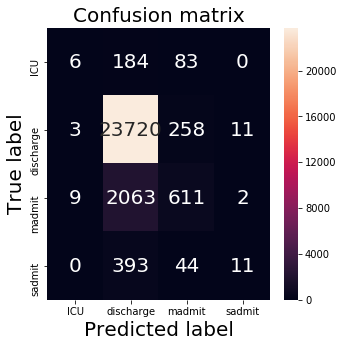

In [42]:
LABELS = data.classes

confusion_matrix = sklearn.metrics.confusion_matrix(targets, predictions)

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", annot_kws={"size": 20});
plt.title("Confusion matrix", fontsize=20)
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.show()

In [47]:
f1_w = sklearn.metrics.f1_score(targets, predictions, average='weighted')
f1 = sklearn.metrics.f1_score(targets, predictions, average=None)
acc = sklearn.metrics.accuracy_score(targets, predictions)
prec = sklearn.metrics.precision_score(targets,predictions, average = None)
rec = sklearn.metrics.recall_score(targets,predictions, average = None)
print ('weighted f1: ', f1_w)
print ('f1:          ', f1)
print ('accuracy:    ', acc)
print ('precision:   ', prec)
print ('recall:      ', rec)

weighted f1:  0.8587475758612368
f1:           [0.041237 0.942167 0.331975 0.04661 ]
accuracy:     0.8886780056938463
precision:    [0.333333 0.899848 0.613454 0.458333]
recall:       [0.021978 0.988663 0.227561 0.024554]


<br>
<br>
<br>
Now gonna try to do better by adding some columns that are from the triage notes
<br>
<br>
<br>

In [30]:
df.columns

Index(['Unnamed: 0', 'ID', 'TriageLevel', 'AgeInYrs', 'GenderDesc',
       'DischargeDisposition', 'PresentingComplaint',
       'PresentingComplaintDesc', 'AdmitLocation', 'PatientService',
       'BloodPressure_LastEDReading', 'systolic', 'diastolic', 'temp', 'pulse',
       'o2sat', 'Unnamed: 0', 'service', 'target2', 'target', 'outcome',
       'discharge', 'dispo', 'Unnamed: 0', 'MedicalHistory', 'SubjectiveNotes',
       'Triage Date & TimeMonth', 'Triage Date & TimeWeek',
       'Triage Date & TimeDay', 'Triage Date & TimeDayofweek',
       'Triage Date & TimeDayofyear', 'Triage Date & TimeIs_month_end',
       'Triage Date & TimeIs_month_start', 'Triage Date & TimeIs_quarter_end',
       'Triage Date & TimeIs_quarter_start', 'Triage Date & TimeIs_year_end',
       'Triage Date & TimeIs_year_start', 'Triage Date & TimeElapsed',
       'medhx1', 'medhx2', 'medhx3', 'medhx4', 'medhx5', 'medhx6'],
      dtype='object')

In [67]:
dep_var = 'outcome'
cat_names = ['TriageLevel',
 'GenderDesc',
 'PresentingComplaint',
        'Triage Date & TimeMonth', 'Triage Date & TimeWeek',
       'Triage Date & TimeDay', 'Triage Date & TimeDayofweek',
       'Triage Date & TimeDayofyear', 'Triage Date & TimeIs_month_end',
       'Triage Date & TimeIs_month_start', 'Triage Date & TimeIs_quarter_end',
       'Triage Date & TimeIs_quarter_start', 'Triage Date & TimeIs_year_end',
       'Triage Date & TimeIs_year_start', 'Triage Date & TimeElapsed',
       'medhx1', 'medhx2', 'medhx3']
cont_names = ['AgeInYrs', 'o2sat', 'pulse','temp','systolic','diastolic']
procs = [FillMissing, Categorify, Normalize]

In [68]:
test = TabularList.from_df(df.copy(),cat_names=cat_names, cont_names=cont_names)

In [69]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_rand_pct(0.1)
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [70]:
f1 = FBeta(beta=1, average = 'weighted')

In [71]:
learn = tabular_learner(data, layers=[200,100], metrics=[accuracy,f1])
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.351834,0.351382,0.886707,0.860668,01:50
1,0.219645,0.381363,0.880721,0.853465,01:51
2,0.116852,0.485410,0.876268,0.852601,01:51
3,0.045589,0.564753,0.878239,0.858996,01:51
4,0.014728,0.654210,0.876122,0.859734,01:50


so significant overfitting here

In [72]:
data.classes

['ICU', 'discharge', 'madmit', 'sadmit']

In [78]:
preds, targets = learn.get_preds(DatasetType.Valid) 
predictions = np.argmax(preds, axis = 1)

In [79]:
f1_w = sklearn.metrics.f1_score(targets, predictions, average='weighted')
f1 = sklearn.metrics.f1_score(targets, predictions, average=None)
acc = sklearn.metrics.accuracy_score(targets, predictions)
prec = sklearn.metrics.precision_score(targets,predictions, average = None)
rec = sklearn.metrics.recall_score(targets,predictions, average = None)
print ('weighted f1: ', f1_w)
print ('f1:          ', f1)
print ('accuracy:    ', acc)
print ('precision:   ', prec)
print ('recall:      ', rec)

weighted f1:  0.8597344261403467
f1:           [0.051282 0.935882 0.382042 0.078292]
accuracy:     0.8761223446966931
precision:    [0.125    0.911839 0.455882 0.244444]
recall:       [0.032258 0.961228 0.328788 0.04661 ]


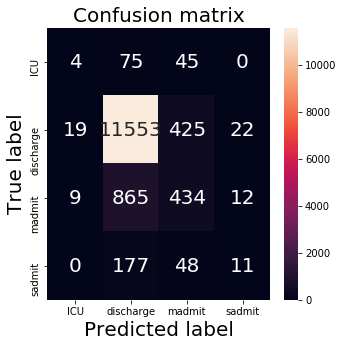

In [74]:
LABELS = data.classes

confusion_matrix = sklearn.metrics.confusion_matrix(targets, predictions)

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", annot_kws={"size": 20});
plt.title("Confusion matrix", fontsize=20)
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.show()

In [75]:
preds, targets = learn.get_preds(DatasetType.Train) 
predictions = np.argmax(preds, axis = 1)

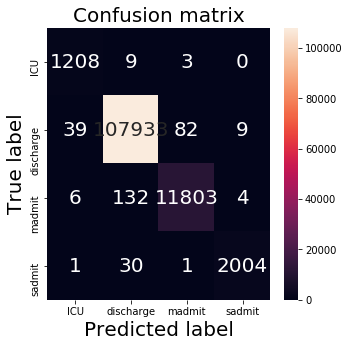

In [76]:
LABELS = data.classes

confusion_matrix = sklearn.metrics.confusion_matrix(targets, predictions)

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", annot_kws={"size": 20});
plt.title("Confusion matrix", fontsize=20)
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.show()

In [57]:
learn = tabular_learner(data, layers=[200,100], metrics=[accuracy,f1], emb_drop = 0.5)
learn.fit_one_cycle(20, 1e-5, wd = 0.3)

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,1.375249,1.322305,0.454048,0.575723,01:52
1,1.330623,1.292534,0.602818,0.692448,01:53
2,1.276737,1.202295,0.735090,0.778157,01:53
3,1.188118,1.117098,0.785167,0.807972,01:55
4,1.047458,1.005684,0.819768,0.829671,01:54
5,0.860077,0.804649,0.859917,0.853979,01:55
6,0.691471,0.640544,0.878239,0.861766,01:54
7,0.531612,0.535471,0.881670,0.861016,01:54
8,0.437552,0.441604,0.884809,0.859236,01:54
9,0.385715,0.401565,0.884955,0.857140,01:54


In [55]:
learn.save('edtriage_tab.pth')

In [58]:
preds, targets = learn.get_preds(DatasetType.Valid) 
predictions = np.argmax(preds, axis = 1)

In [59]:
f1_w = sklearn.metrics.f1_score(targets, predictions, average='weighted')
f1 = sklearn.metrics.f1_score(targets, predictions, average=None)
acc = sklearn.metrics.accuracy_score(targets, predictions)
prec = sklearn.metrics.precision_score(targets,predictions, average = None)
rec = sklearn.metrics.recall_score(targets,predictions, average = None)
print ('weighted f1: ', f1_w)
print ('f1:          ', f1)
print ('accuracy:    ', acc)
print ('precision:   ', prec)
print ('recall:      ', rec)

weighted f1:  0.8537425009837355
f1:           [0.       0.939527 0.329009 0.      ]
accuracy:     0.8839331338053873
precision:    [0.       0.898164 0.55614  0.      ]
recall:       [0.       0.984883 0.233604 0.      ]


/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


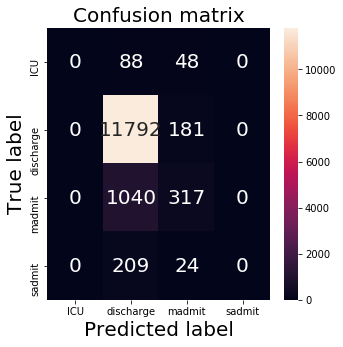

In [60]:
LABELS = data.classes

confusion_matrix = sklearn.metrics.confusion_matrix(targets, predictions)

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", annot_kws={"size": 20});
plt.title("Confusion matrix", fontsize=20)
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.show()

even with more columns and slower training, I can't do better than 88% accuracy and f-score 0.85